In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlob

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Load the dataset
data_dir = '/kaggle/input/brain-tumor-mri-classification-dataset/Brain_Tumor_MRI_Image_Dataset/Training'

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical'  # Ensures that labels are one-hot encoded
)

# Normalize the data
data = data.map(lambda x, y: (x / 255, y))

# Split the data into training, validation, and test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

# Define the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

num_classes = 4  # Number of classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define the TensorBoard callback
logdir = '/kaggle/working/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
hist = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[tensorboard_callback]
)

Found 5712 files belonging to 4 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 119s 937ms/step - accuracy: 0.5988 - loss: 0.9318 - val_accuracy: 0.8194 - val_loss: 0.5252
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 139s 913ms/step - accuracy: 0.8390 - loss: 0.4113 - val_accuracy: 0.8837 - val_loss: 0.3462
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 904ms/step - accuracy: 0.8958 - loss: 0.2743 - val_accuracy: 0.8967 - val_loss: 0.2796
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 905ms/step - accuracy: 0.9335 - loss: 0.1829 - val_accuracy: 0.9054 - val_loss: 0.2920
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 916ms/step - accuracy: 0.9457 - loss: 0.1311 - val_accuracy: 0.9071 - val_loss: 0.2899
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 906ms/step - accuracy: 0.9636 - loss: 0.0953 - val_accuracy: 0.9123 - val_loss: 0.2856
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 909ms/step - accuracy: 0.9775 - loss: 0.0632 - val_accuracy: 0.9054 - val_loss: 0.3547
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 125s 997ms/step - accuracy: 0.9907 -

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.8307 - loss: 0.5106
Test Loss: 0.5867903828620911
Test Accuracy: 0.824999988079071


In [ ]:
import cv2

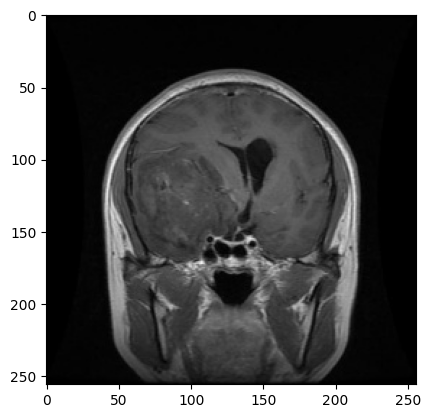

In [ ]:
img=cv2.imread('/kaggle/input/brain-tumor-mri-classification-dataset/Brain_Tumor_MRI_Image_Dataset/Testing/glioma/glioma_100.jpg')
plt.imshow(img)
plt.show()

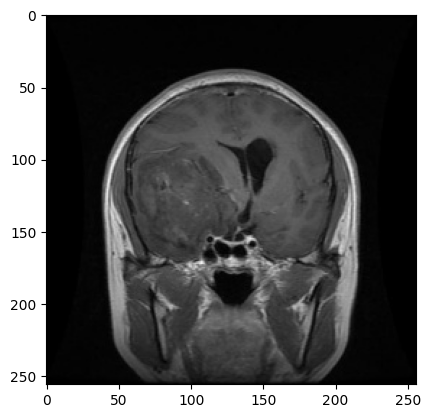

In [ ]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0)
yh=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [ ]:
yh

array([[7.3903626e-01, 2.6096359e-01, 8.4286391e-08, 1.3399455e-08]],
      dtype=float32)

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load and resize the image
img = cv2.imread('/kaggle/input/brain-tumor-mri-classification-dataset/Brain_Tumor_MRI_Image_Dataset/Testing_Augmented/meningioma/meningioma_107_aug_5.jpg')
resize = tf.image.resize(img, (256, 256))

# Display the original and resized images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.imshow(resize.numpy().astype(int))
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Expand dimensions and normalize
resize_expanded = np.expand_dims(resize, axis=0)
resize_normalized = resize_expanded / 255.0  # Normalize to [0, 1]

# Predict using the model
predictions = model.predict(resize_normalized)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Define class names based on your dataset structure
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Print the predicted class
print(f"Predicted Class: {class_names[predicted_class]}")